In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations



In [2]:
data_raw = pd.read_excel('yandex_hack.xlsx', sheet_name='result 1')

In [3]:
data_raw['order_created_datetime'] = pd.to_datetime(data_raw['order_created_datetime']).astype('int64') // 10 ** 9 # переведем время в секунды

In [4]:
# разделим датасет по выборке ресторанов

dataA_raw = data_raw[data_raw.brand_name=='A'] 
dataB_raw = data_raw[data_raw.brand_name=='B']

In [5]:
data3 = dataA_raw.dropna(axis=0) # оставим в первой выборке только заказы, которые были объединены 

In [6]:
data3

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city
257,1442165828,A,8da96a16838351f6f096d45a4e159f4d,89164b34e9d20a1c1918d156ca7c2b1e,9f8fb710b29202ac3dc36a6712186de4,0.0,2644231e976679c41b15a11524a4e530,8,e6705560085199e9674cd721ee844d0d
435,1442143129,A,b3bf2fc20c4646298c05716fbe1aa135,afc4c403cc654734538b007fdbc87664,d887b9731cf06e5dd77623ef5ad56cd8,0.0,8632dc891885aba8e572522dedc7572f,3,e6705560085199e9674cd721ee844d0d
526,1442318103,A,2acb4a3db77b139dda1cd6bcbbfd4b8e,986941e665d646910d432b5f48f9b94c,fd0dde82caff2d709ac803c8872fd1e9,0.0,7e8de661602e618fe8cb16c8b3e02a95,3,e6705560085199e9674cd721ee844d0d
684,1442338563,A,525505123c94df09ef5b5614e4afe7b2,d469fe73826b9b3f1a3ee58869d91757,b4e39b3e84e81f1ea34c353896ff6853,0.0,876e5276f463736bf52fc540664fd02e,5,e6705560085199e9674cd721ee844d0d
717,1442164087,A,680fee36fb26805d3bf7af52cdb44f0f,831b2771564b022030ce699e6807ab03,6efbee90330a0bced1f7938a2e209054,0.0,8a2d57b71452eed5c78c3f81ee2999d2,3,e6705560085199e9674cd721ee844d0d
...,...,...,...,...,...,...,...,...,...
65377,1442241635,A,974d115d8040e56fcac9638bd33e1731,bdb29739e550cd9bce8d0b2e07b6f33b,759928f3b5075cf0eea68cc97d17cf06,1.0,88750b500f3f628d7d85b352f6113736,2,e6705560085199e9674cd721ee844d0d
65416,1442241320,A,974d115d8040e56fcac9638bd33e1731,759928f3b5075cf0eea68cc97d17cf06,bdb29739e550cd9bce8d0b2e07b6f33b,0.0,88750b500f3f628d7d85b352f6113736,7,e6705560085199e9674cd721ee844d0d
65456,1442334920,A,b3bf2fc20c4646298c05716fbe1aa135,f67eb84cf826ea33988019b56cf99b6b,517d0dcde489a94e594d2c028dbcb84a,1.0,310b2378b5bf2b9f7046c70c3082103d,3,e6705560085199e9674cd721ee844d0d
65595,1442273122,A,b3bf2fc20c4646298c05716fbe1aa135,0e0984a5a2019591d54af8bde172e75b,a91a73cc77884c0c594d0a600aa0fe5b,0.0,d41ff061323280cf0cebd9adb7a0755e,5,e6705560085199e9674cd721ee844d0d


Всего было объединено в мультизаказы 442 заказа. То есть в выборке присутствует информация о 221 мультизаказе. 

In [7]:
data_0 = data3[data3.first_in_multiorder_flg==0.0] # теперь разделим заказы на две части по номеру в мультизаказе
data_1 = data3[data3.first_in_multiorder_flg==1.0]

In [8]:
data_1.drop(['order_id'], inplace = True, axis = 1) # удалим из одной выборки индификатор заказа, а из другой индификатор объедененного заказа
data_0.drop(['batched_with_order_id'], inplace = True, axis = 1)
data_1.columns = ['order_created_datetime_1', 'brand_name', 'rest_id' , 'order_id', 'first_in_multiorder_flg_1', 'courier_id', 'order_items_cnt_1', 'city']
# переименуем колонки для того чтобы можно было соеденить два датасета

C:\Users\shaienn\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
data_0 = data_0.merge(data_1, how='inner') # соеденим два датасета по принципу общих значений
data_0

,order_created_datetime,brand_name,rest_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,order_created_datetime_1,first_in_multiorder_flg_1,order_items_cnt_1
0,1442165828,A,8da96a16838351f6f096d45a4e159f4d,9f8fb710b29202ac3dc36a6712186de4,0.0,2644231e976679c41b15a11524a4e530,8,e6705560085199e9674cd721ee844d0d,1442165669,1.0,8
1,1442143129,A,b3bf2fc20c4646298c05716fbe1aa135,d887b9731cf06e5dd77623ef5ad56cd8,0.0,8632dc891885aba8e572522dedc7572f,3,e6705560085199e9674cd721ee844d0d,1442142624,1.0,4
2,1442318103,A,2acb4a3db77b139dda1cd6bcbbfd4b8e,fd0dde82caff2d709ac803c8872fd1e9,0.0,7e8de661602e618fe8cb16c8b3e02a95,3,e6705560085199e9674cd721ee844d0d,1442317504,1.0,3
3,1442338563,A,525505123c94df09ef5b5614e4afe7b2,b4e39b3e84e81f1ea34c353896ff6853,0.0,876e5276f463736bf52fc540664fd02e,5,e6705560085199e9674cd721ee844d0d,1442338075,1.0,3
4,1442164087,A,680fee36fb26805d3bf7af52cdb44f0f,6efbee90330a0bced1f7938a2e209054,0.0,8a2d57b71452eed5c78c3f81ee2999d2,3,e6705560085199e9674cd721ee844d0d,1442163795,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
216,1442308194,A,a1665b955392495315d4708ab81fc60c,4914b62257431410a226da5d8945b78b,0.0,df212efe543f7f2465672b7609f68159,3,e6705560085199e9674cd721ee844d0d,1442308500,1.0,2
217,1442326382,A,209e34a1614d9469fddabc7158003653,07870806f989cab8d7d144e7d19ee9a0,0.0,f3f94fe6582fc6ac052af9a8ff384a2e,7,e6705560085199e9674cd721ee844d0d,1442325784,1.0,3
218,1442241320,A,974d115d8040e56fcac9638bd33e1731,bdb29739e550cd9bce8d0b2e07b6f33b,0.0,88750b500f3f628d7d85b352f6113736,7,e6705560085199e9674cd721ee844d0d,1442241635,1.0,2
219,1442273122,A,b3bf2fc20c4646298c05716fbe1aa135,a91a73cc77884c0c594d0a600aa0fe5b,0.0,d41ff061323280cf0cebd9adb7a0755e,5,e6705560085199e9674cd721ee844d0d,1442272267,1.0,5


В парах заказов в мультизаказе отличаются только показатели времени заказа и количество позиций в заказе. Можно посмотреть корреляцию времени. И добавить новый столбец с разницой во времени между двумя заказами.

In [10]:
data_0['difference'] = abs(data_0.order_created_datetime - data_0.order_created_datetime_1) # добавим столбец с разницой во времени

In [11]:
data_0

,order_created_datetime,brand_name,rest_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,order_created_datetime_1,first_in_multiorder_flg_1,order_items_cnt_1,difference
0,1442165828,A,8da96a16838351f6f096d45a4e159f4d,9f8fb710b29202ac3dc36a6712186de4,0.0,2644231e976679c41b15a11524a4e530,8,e6705560085199e9674cd721ee844d0d,1442165669,1.0,8,159
1,1442143129,A,b3bf2fc20c4646298c05716fbe1aa135,d887b9731cf06e5dd77623ef5ad56cd8,0.0,8632dc891885aba8e572522dedc7572f,3,e6705560085199e9674cd721ee844d0d,1442142624,1.0,4,505
2,1442318103,A,2acb4a3db77b139dda1cd6bcbbfd4b8e,fd0dde82caff2d709ac803c8872fd1e9,0.0,7e8de661602e618fe8cb16c8b3e02a95,3,e6705560085199e9674cd721ee844d0d,1442317504,1.0,3,599
3,1442338563,A,525505123c94df09ef5b5614e4afe7b2,b4e39b3e84e81f1ea34c353896ff6853,0.0,876e5276f463736bf52fc540664fd02e,5,e6705560085199e9674cd721ee844d0d,1442338075,1.0,3,488
4,1442164087,A,680fee36fb26805d3bf7af52cdb44f0f,6efbee90330a0bced1f7938a2e209054,0.0,8a2d57b71452eed5c78c3f81ee2999d2,3,e6705560085199e9674cd721ee844d0d,1442163795,1.0,4,292
...,...,...,...,...,...,...,...,...,...,...,...,...
216,1442308194,A,a1665b955392495315d4708ab81fc60c,4914b62257431410a226da5d8945b78b,0.0,df212efe543f7f2465672b7609f68159,3,e6705560085199e9674cd721ee844d0d,1442308500,1.0,2,306
217,1442326382,A,209e34a1614d9469fddabc7158003653,07870806f989cab8d7d144e7d19ee9a0,0.0,f3f94fe6582fc6ac052af9a8ff384a2e,7,e6705560085199e9674cd721ee844d0d,1442325784,1.0,3,598
218,1442241320,A,974d115d8040e56fcac9638bd33e1731,bdb29739e550cd9bce8d0b2e07b6f33b,0.0,88750b500f3f628d7d85b352f6113736,7,e6705560085199e9674cd721ee844d0d,1442241635,1.0,2,315
219,1442273122,A,b3bf2fc20c4646298c05716fbe1aa135,a91a73cc77884c0c594d0a600aa0fe5b,0.0,d41ff061323280cf0cebd9adb7a0755e,5,e6705560085199e9674cd721ee844d0d,1442272267,1.0,5,855


In [12]:
data_0.corr() # посмотрим корреляцию

,order_created_datetime,first_in_multiorder_flg,order_items_cnt,order_created_datetime_1,first_in_multiorder_flg_1,order_items_cnt_1,difference
order_created_datetime,1.000000,NaN,-0.112357,0.999616,NaN,-0.019500,-0.108581
first_in_multiorder_flg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_items_cnt,-0.112357,NaN,1.000000,-0.111420,NaN,0.024351,0.038925
order_created_datetime_1,0.999616,NaN,-0.111420,1.000000,NaN,-0.021875,-0.082326
first_in_multiorder_flg_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_items_cnt_1,-0.019500,NaN,0.024351,-0.021875,NaN,1.000000,-0.016769
difference,-0.108581,NaN,0.038925,-0.082326,NaN,-0.016769,1.000000


In [13]:
data_0.difference.max() # посмотрим максимальную разницу во времени

31188

Подозрительно большая. Построим график.

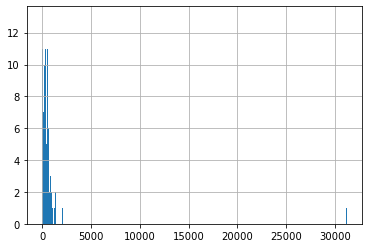

In [14]:
data_0.difference.hist(bins=1000)

Очевидно значение 31188 является выбросом. 

In [15]:
data_0 = data_0.query('difference != 31188') # удалим выброс

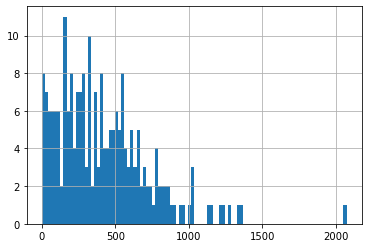

In [16]:
data_0.difference.hist(bins=100) # построим график еще раз

In [17]:
# посмотрим границы выбросов 
perc25 = data_0['difference'].quantile(0.25)
perc75 = data_0['difference'].quantile(0.75)
IQR = perc75 - perc25
difference_limit = perc75 + 1.5*IQR
print(f'25-й перцентиль: {perc25},\n\
75-й перцентиль: {perc75},\n\
IQR: {IQR},\n\
Границы выбросов: [0, {difference_limit}]')


25-й перцентиль: 175.25,
75-й перцентиль: 578.25,
IQR: 403.0,
Границы выбросов: [0, 1182.75]


In [18]:
data_0.corr()

,order_created_datetime,first_in_multiorder_flg,order_items_cnt,order_created_datetime_1,first_in_multiorder_flg_1,order_items_cnt_1,difference
order_created_datetime,1.000000,NaN,-0.108329,0.999980,NaN,-0.023876,-0.033520
first_in_multiorder_flg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_items_cnt,-0.108329,NaN,1.000000,-0.108340,NaN,0.026222,-0.038605
order_created_datetime_1,0.999980,NaN,-0.108340,1.000000,NaN,-0.025114,-0.035558
first_in_multiorder_flg_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_items_cnt_1,-0.023876,NaN,0.026222,-0.025114,NaN,1.000000,0.155006
difference,-0.033520,NaN,-0.038605,-0.035558,NaN,0.155006,1.000000


Наше предположение: заказы будут объеденены в мультизаказ если выполнены два условия: 1. одинаковый ресторан, 2. близкое время заказа: если корреляция примерно равна 0.999616 (пока не точно) или если разница во времени меньше самой большой разницы во времени в выборке А - пока не определились со значением)

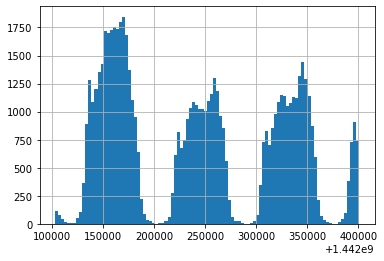

In [19]:
data_raw.order_created_datetime.hist(bins=100) # график распределения количества заказов по времени (вдруг пригодится)

### Вычислим долю мультизаказов

In [20]:
# доля мультизаказов = кол-во заказов, которые доставлялись вместе с другими / общее количество заказов
# Набор данных data_0 содержит пары объединенных заказов, таким образом, чтобы получить количество объединенных
# заказов, мы умножаем на 2.
round((data_0.order_id.count() * 2)/ dataA_raw.order_id.count(),3) 

0.046

In [21]:
# Таким образом, процент объединенных заказов для выборки A = ~4,6 %

# Рассчет модели

In [22]:
# Для удобства сравнения расширим dataset dataA_raw столбцом difference

def fz(x):
    for o in x.order_id:
        t1 = x[x.batched_with_order_id == o]
        if t1.order_created_datetime.size == 0:
            continue
        t1 = t1.order_created_datetime.item()
        t2 = x[x.order_id == o].order_created_datetime.item()
        x.loc[x.order_id == o, 'difference'] = abs(t1 - t2)
    return x

dataA_with_dif = dataA_raw.groupby(['rest_id']).apply(fz)

### Посмотрим, что из себя представляет датасет

In [23]:
dataA_with_dif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9629 entries, 1 to 66463
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_created_datetime   9629 non-null   int64  
 1   brand_name               9629 non-null   object 
 2   rest_id                  9629 non-null   object 
 3   batched_with_order_id    442 non-null    object 
 4   order_id                 9629 non-null   object 
 5   first_in_multiorder_flg  442 non-null    float64
 6   courier_id               9437 non-null   object 
 7   order_items_cnt          9629 non-null   int64  
 8   city                     9629 non-null   object 
 9   difference               442 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 827.5+ KB


In [24]:
print(f'незаполненные значения:\n{dataA_with_dif.isnull().sum()}')

незаполненные значения:
order_created_datetime        0
brand_name                    0
rest_id                       0
batched_with_order_id      9187
order_id                      0
first_in_multiorder_flg    9187
courier_id                  192
order_items_cnt               0
city                          0
difference                 9187
dtype: int64


### Посмотрим распределение мультизаказов с шагом в 60 секунд

In [25]:
time_range = range(0, int(difference_limit), 60)
pd.cut(dataA_with_dif.difference, list(time_range)).value_counts().sort_index()

(0, 60]         42
(60, 120]       32
(120, 180]      42
(180, 240]      30
(240, 300]      42
(300, 360]      30
(360, 420]      32
(420, 480]      28
(480, 540]      30
(540, 600]      30
(600, 660]      22
(660, 720]      14
(720, 780]      12
(780, 840]      18
(840, 900]       6
(900, 960]       6
(960, 1020]      2
(1020, 1080]     6
(1080, 1140]     2
Name: difference, dtype: int64

### Посмотрим, как распределялось количество позиций в мультизаказах

In [26]:
items_range = range(1, int(dataA_with_dif.order_items_cnt.max()), 1)
pd.cut(dataA_with_dif[dataA_with_dif.difference.notna()].order_items_cnt, list(items_range)).value_counts().sort_index()

(1, 2]      58
(2, 3]      96
(3, 4]      79
(4, 5]      59
(5, 6]      37
(6, 7]      35
(7, 8]      20
(8, 9]      11
(9, 10]      8
(10, 11]     4
(11, 12]     5
(12, 13]     5
(13, 14]     1
(14, 15]     4
(15, 16]     1
(16, 17]     0
(17, 18]     0
(18, 19]     0
(19, 20]     0
(20, 21]     0
(21, 22]     1
(22, 23]     0
(23, 24]     0
(24, 25]     0
(25, 26]     0
(26, 27]     0
(27, 28]     0
(28, 29]     0
(29, 30]     0
(30, 31]     0
(31, 32]     0
(32, 33]     0
(33, 34]     0
Name: order_items_cnt, dtype: int64

### Посмотрим на курьеров

In [27]:
dataA_raw.courier_id.value_counts()

5b17547f825d9cf35c7853621dd842f8    643
d016782f2092ef2b2f943e736ececced    136
0a59239d252c0b6b98696e859b8c1c8e    128
0738b92dbb0db993c16a32321000f371    120
d1acfd6dbf4eb1015769d862d511dd07     99
                                   ... 
0453c6c70f86b11c570ca6d1d53ce702      1
a03bfe8e052f8cfb5dc2b01bf2168c79      1
2941020aad2a09dab29f2613359bcb6f      1
7909115ce8953eccfd9bdb1a511cef04      1
f1cee6c3778c8f58ed83641fedca0db0      1
Name: courier_id, Length: 4034, dtype: int64

Курьер с id 5b17547f825d9cf35c7853621dd842f8 явно выделяется, хотелось бы удалить, но он занимает достаточно значимую часть в объеме набора данных А:

In [28]:
#dataA_raw = dataA_raw.query('courier_id != "5b17547f825d9cf35c7853621dd842f8"') 
dataA_raw.order_id.count() / dataA_raw[dataA_raw.courier_id == '5b17547f825d9cf35c7853621dd842f8'].order_id.count()

# Почти 15 процентов

14.975116640746501

In [29]:
# Попытка проанализировать соотношение обычных и мульти заказов у курьеров. 

In [30]:
courier_single = dataA_raw[~(dataA_raw.batched_with_order_id.notna())].groupby('courier_id').order_id.count().sort_values().reset_index(name='counts_single')
courier_multi = dataA_raw[dataA_raw.batched_with_order_id.notna()].groupby('courier_id').order_id.count().sort_values().reset_index(name='counts_multi')
courier_data = courier_single.merge(courier_multi, how='outer') # соеденим два датасета по принципу общих значений
print(courier_data.corr())

               counts_single  counts_multi
counts_single       1.000000     -0.006415
counts_multi       -0.006415      1.000000


Определенно, есть какой-то фактор в зависимости от времени между заказами, но мы его не нашли. Попытка сымитировать его - ниже. Нормально отладить его тоже не успели.

In [143]:
import random

def probability_factor(limit):
    step = 60
    total = int(difference_limit / step)
    zeroes = int(limit / step) + 2
    
    listofones = [1] * total
    
    for i in range(0, zeroes):
        if i < len(listofones):
            listofones[i] = 0
        
    z = random.randint(0, total - 1)
    
    return listofones[z] 


In [162]:
def rest_analyzer(x):
    skip_list = []

    #for l in time_range:
    # Перебираем все заказы одного ресторана
    for order_id in x.order_id:

        # Если пара для мультизаказа сформированы, то эта пара будет добавлена в скип-лист
        if order_id in skip_list:
            continue

        # Находим дату создания исследуемого заказа
        order_time = x[x.order_id == order_id].order_created_datetime.item()

        # Находим город исследуемого заказа
        city = x[x.order_id == order_id].city.item()

        candidates_df = x[(~(x.order_id.isin(skip_list))
                & ~(x.order_id == order_id)
               & (x.city == city))]    

        # Поиск минимального модуля разницы во времени создания заказа
        t= np.abs(candidates_df.order_created_datetime.values - order_time)
        if t.size == 0:
            continue
        min_difference = np.amin(t, axis=0)

        if (min_difference < int(difference_limit)):
            candidate_id = candidates_df.iloc[np.argmin(t, axis=0)].order_id
            #if (probability_factor(l) == 0):
            #    skip_list.append(order_id)
            #    continue

            x.loc[x.order_id == order_id, 'candidate'] = candidate_id
            x.loc[x.order_id == order_id, 'difference'] = min_difference
            x.loc[x.order_id == candidate_id, 'candidate'] = order_id
            x.loc[x.order_id == candidate_id, 'difference'] = min_difference
            skip_list.append(candidate_id)
            skip_list.append(order_id)
    return x

def check_multiorder(ds):
    d = ds.sort_values('order_created_datetime')
    d['candidate'] = np.nan
    d['difference'] = np.nan
    return d.groupby(['rest_id']).apply(rest_analyzer)  

In [164]:
%%time
dataA = dataA_raw.drop(columns=['batched_with_order_id', 'first_in_multiorder_flg'])
research_dataA = check_multiorder(dataA.dropna())

Wall time: 26.3 s


In [148]:
research_dataA

,order_created_datetime,brand_name,rest_id,order_id,courier_id,order_items_cnt,city,candidate,difference
64367,1442102405,A,d1e66c75e8deec66a0aa08aefa5736aa,ffc6ecf37c8391821bda9111320f299c,d016782f2092ef2b2f943e736ececced,2,e6705560085199e9674cd721ee844d0d,3e293d204168757552ebd7b62ea38889,34.0
58676,1442102413,A,39baa0eae83853d736e398093239dcd5,49d061c7882d839710443d8ac8108d7e,5b17547f825d9cf35c7853621dd842f8,7,e6705560085199e9674cd721ee844d0d,09e0e13f08f130198a21ad41cb2124cc,569.0
11760,1442102439,A,d1e66c75e8deec66a0aa08aefa5736aa,3e293d204168757552ebd7b62ea38889,d016782f2092ef2b2f943e736ececced,10,e6705560085199e9674cd721ee844d0d,ffc6ecf37c8391821bda9111320f299c,34.0
61748,1442102459,A,7fc42db5411a27043847b4ab8aa7a5a1,b4bd74ec8d2f492f305eb70c90c3fce5,d016782f2092ef2b2f943e736ececced,13,e6705560085199e9674cd721ee844d0d,NaN,NaN
56702,1442102504,A,3b83cec768ee9456b59a8051ead1c6fb,e656c891f5ee182b266b7def80ad70ae,d016782f2092ef2b2f943e736ececced,6,e6705560085199e9674cd721ee844d0d,NaN,NaN
...,...,...,...,...,...,...,...,...,...
62591,1442400915,A,d96c27c8d8e2c7e386dd0cf79735df64,9da68e182b2585afa1bb442c00c7b568,3c451a2f8eff73da6e19c4de4d470bab,2,e6705560085199e9674cd721ee844d0d,NaN,NaN
22637,1442400960,A,123d69fd98bedf3de42693cb48e89333,00cef5ac7626fefa6ec2ee1d8e759e54,74079a7633c1e8917ef8ac1c4cafe881,3,e6705560085199e9674cd721ee844d0d,NaN,NaN
38222,1442400987,A,0045f2feaafc5218f9d1ce2b2554557b,47c6ef461d563832e2461897e37b3d59,ffc7a1b81573137d147fa9a39f93244e,3,b6a1beaea9592d98e402ec9af5c4f507,NaN,NaN
21545,1442401000,A,463ffde7dac4c6ec57d28dfddf9e3f53,98e3f154de55f454e5c7c0d51613e28f,328b097bfd153833ff638ab3682ba339,3,29b5d0e91de8f84cbb829977dfb8f4a3,NaN,NaN


## Посмотрим еще раз на долю мультизаказов в наборе данных А согласно модели

#### Согласно референсному набору данных с готовым распределением мультизаказов

In [165]:
combinedA_ref = dataA_raw[dataA_raw.batched_with_order_id.notna()].order_id.count()
totalA_ref = dataA_raw.order_id.count()

print(f" combinedA_ref : {combinedA_ref} ; totalA_ref : {totalA_ref}")

round(combinedA_ref / totalA_ref, 3) 

 combinedA_ref : 442 ; totalA_ref : 9629


0.046

#### Согласно анализу с помощью модели

In [166]:
combinedA = research_dataA[research_dataA.candidate.notna()].order_id.count()
totalA = dataA_raw.order_id.count()

print(f" combinedA : {combinedA} ; totalA : {totalA}")

round(combinedA / totalA, 3) 

 combinedA : 3270 ; totalA : 9629


0.34

### Вывод

Точность модели на тестовом наборе данных ~= -29%

## Сравниваем реальные данные компаний А и прогноз на основе модели. 

 Есть диапазон времени в течении которого взятые заказы имеют шанс быть объединены. Мы разделили этот диапазон на сегменты по 60 секунд и сравнили количество заказов референсной и модельной выборок за каждый сегмент. 

In [167]:
for i, r in enumerate(time_range):
    a3 = np.nan
    a4 = np.nan
    
    if i == 0:
        continue
    a1 = research_dataA[(research_dataA.difference < r) & (research_dataA.difference >= time_range[i - 1])]
    a2 = dataA_with_dif[(dataA_with_dif.difference < r) & (dataA_with_dif.difference >= time_range[i - 1])]
    
    print(f" time_range: {r} ; model_data: {a1.order_id.count()} ; reference_data: {a2.order_id.count()}")
    

 time_range: 60 ; model_data: 192 ; reference_data: 40
 time_range: 120 ; model_data: 184 ; reference_data: 32
 time_range: 180 ; model_data: 198 ; reference_data: 40
 time_range: 240 ; model_data: 178 ; reference_data: 34
 time_range: 300 ; model_data: 208 ; reference_data: 42
 time_range: 360 ; model_data: 176 ; reference_data: 30
 time_range: 420 ; model_data: 164 ; reference_data: 32
 time_range: 480 ; model_data: 172 ; reference_data: 28
 time_range: 540 ; model_data: 174 ; reference_data: 30
 time_range: 600 ; model_data: 178 ; reference_data: 30
 time_range: 660 ; model_data: 150 ; reference_data: 22
 time_range: 720 ; model_data: 188 ; reference_data: 14
 time_range: 780 ; model_data: 142 ; reference_data: 12
 time_range: 840 ; model_data: 142 ; reference_data: 18
 time_range: 900 ; model_data: 158 ; reference_data: 6
 time_range: 960 ; model_data: 126 ; reference_data: 6
 time_range: 1020 ; model_data: 164 ; reference_data: 2
 time_range: 1080 ; model_data: 144 ; reference_dat

In [168]:
research_dataA[research_dataA.candidate.notna()].order_id.count()

3270

In [169]:
dataA_raw[dataA_raw.batched_with_order_id.notna()].order_id.count()

442

# Анализируем набор данных B

### Посмотрим, что из себя представляет датасет

In [154]:
dataB_raw

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city
0,1442351323,B,7cc98331ddb8ccffe464455f3df763d9,NaN,0b6f25c79b35fd1e6d28d845b7ee511d,NaN,3f1b96f620988a92d3409ea05e87bd36,3,c6fbacc5cab7e134c9db2a4bbfcc5b64
3,1442165032,B,7cc98331ddb8ccffe464455f3df763d9,NaN,5dc658f0928569dbefac74c9f311031c,NaN,81647a72700bd46635d9606082360cc8,6,c6fbacc5cab7e134c9db2a4bbfcc5b64
4,1442142905,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3da09410aeab781baf4b7039fc9b125c,NaN,065c18216b6d3369d4cc36418c6e80f2,7,c6fbacc5cab7e134c9db2a4bbfcc5b64
5,1442230084,B,4f862b1c0f475f2ec02d0bb492e1bb6b,NaN,0d87ec6db915db7b08d030c180b5544d,NaN,901d78a522546d63a5880dca87a9fc68,2,29b5d0e91de8f84cbb829977dfb8f4a3
6,1442340327,B,7cc98331ddb8ccffe464455f3df763d9,NaN,2962a825d28d38d8521732054cd33a21,NaN,4254e1350fb4b678534934e12186ca5b,8,c6fbacc5cab7e134c9db2a4bbfcc5b64
...,...,...,...,...,...,...,...,...,...
66457,1442351866,B,6eac513bc19a193c9a3e948f0fdfee2f,NaN,49efd4ae86f18ba51a9e2c342ac7a074,NaN,c8705ecd2fb2a8e4fb37626784aebe5d,5,e6705560085199e9674cd721ee844d0d
66458,1442270657,B,6eac513bc19a193c9a3e948f0fdfee2f,NaN,4d7468068cd05e471f386344f5c0563f,NaN,6e04b6a777a347ed138d8e0cb31e9773,3,e6705560085199e9674cd721ee844d0d
66459,1442243499,B,6eac513bc19a193c9a3e948f0fdfee2f,NaN,b708d7b95a1074dffa489f24979e75da,NaN,341d498debd8e1f1480085368a039fe0,2,e6705560085199e9674cd721ee844d0d
66460,1442147512,B,7b2d079460287a2790c8ff8cdd00662a,NaN,067c8c3c6fe182ce5929795a66ce6b99,NaN,78254a70dcbad06f793b8310d6a341f2,6,ea9f1e9302826b93f5ac1898375fbc38


In [155]:
print(f'незаполненные значения:\n{dataB_raw.isnull().sum()}')

незаполненные значения:
order_created_datetime         0
brand_name                     0
rest_id                        0
batched_with_order_id      56835
order_id                       0
first_in_multiorder_flg    56835
courier_id                    70
order_items_cnt                0
city                           0
dtype: int64


In [41]:
# Уберем лишние столбцы
dataB = dataB_raw.drop(columns=['batched_with_order_id', 'first_in_multiorder_flg'])

#### Применим модель на набор данных B

In [170]:
%%time
research_dataB = check_multiorder(dataB.dropna())

Wall time: 3min 28s


In [171]:
research_dataB

,order_created_datetime,brand_name,rest_id,order_id,courier_id,order_items_cnt,city,candidate,difference
41675,1442102444,B,69a08198a23fac8f83359e2ec23a49b6,d9f50562ab79c432e64413fcee7aeb9c,8ec5e3cc3bc59b70a0c8863b0355cc92,3,e6705560085199e9674cd721ee844d0d,5cc2b1699fdbeee506fb770ff77c4ff9,9.0
41533,1442102453,B,69a08198a23fac8f83359e2ec23a49b6,5cc2b1699fdbeee506fb770ff77c4ff9,50c20cfed81be8a8fbcd8dc5b2e2ab76,7,e6705560085199e9674cd721ee844d0d,d9f50562ab79c432e64413fcee7aeb9c,9.0
61228,1442102507,B,938cc47b8207a782316f907be53aab3c,b43251899246c62369370f143f2e73b2,4b6de04194b5a6f6ebdf6e09458eab6f,1,e6705560085199e9674cd721ee844d0d,ad4c9f3927f793d870ba5f2c0e81246b,644.0
41753,1442102623,B,69a08198a23fac8f83359e2ec23a49b6,943eee04ddeee9b44635947d7c0a8f41,768f844a816657e7533495bd01bc2a80,3,e6705560085199e9674cd721ee844d0d,1cdd6f0ceaf0d22a266e783f409b726d,334.0
50735,1442102661,B,d3fba5f2e58b2a4f4dc4bf94d6cc3e49,75863a090739e1b8c50747bea638639a,b30f23a13ea180021abfcb8f98d126cc,1,e6705560085199e9674cd721ee844d0d,553eb2b08fe57e4d16e99b19de824926,160.0
...,...,...,...,...,...,...,...,...,...
18992,1442400996,B,7b2d079460287a2790c8ff8cdd00662a,e2811aa742866b51a56ea9f3e2bfc373,423dc018bb2d2e3604f863aa145f8851,1,ea9f1e9302826b93f5ac1898375fbc38,NaN,NaN
62680,1442401005,B,0596c848dec6a3c13396cc4b80f8974c,4d79146812797a87907c6f5b144596a9,4c122524cdec8e402db29fb2e7136508,9,29b5d0e91de8f84cbb829977dfb8f4a3,NaN,NaN
43883,1442401013,B,7cc98331ddb8ccffe464455f3df763d9,06565a86181e342c7d64b1ea788b308c,906808228a91832545f6e52a6c202739,2,c6fbacc5cab7e134c9db2a4bbfcc5b64,NaN,NaN
2612,1442401017,B,ce43eec08c9089152e6a8d6f2b6cc888,de69eb79833a6f417f316ab70c17ce9c,6d684c83727f7ca26516270d56d6d1f9,3,feb10fbf40476b6ca4793a84b67011cf,f75eb4b265ff0259e0c503829a6f2a83,106.0


In [172]:
combinedB = research_dataB[research_dataB.candidate.notna()].order_id.count()
totalB = dataB.dropna().order_id.count()

print(f" combinedB : {combinedB} ; totalB : {totalB}")

round(combinedB / totalB, 3) 

 combinedB : 42976 ; totalB : 56765


0.757